In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
column_names = ['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']
df1 = pd.read_csv('/gpfs/commons/groups/gursoy_lab/shong/Github/composable-fe-rs/plain_model/breast/breast-cancer.data', header=None, names=column_names)

In [4]:
df1.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [5]:
def get_info_dataframe(dataframe):
    print(f"DATAFRAME GENERAL INFO - \n")
    print(dataframe.info(),"\n")
    print(f"DATAFRAME MISSING INFO - \n")
    print(dataframe.isnull().sum(),"\n")
    print(f"DATAFRAME SHAPE INFO - \n")
    print(dataframe.shape)

In [6]:
get_info_dataframe(df1)

DATAFRAME GENERAL INFO - 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB
None 

DATAFRAME MISSING INFO - 

class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64 

DATAFRAME SHAPE INFO - 

(286, 10)


In [7]:
categorical_columns = ['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat']
df = df1.copy()
for name in categorical_columns:
    df[name] = df[name].astype('category')
    df[name] = df[name].cat.codes

df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,1,2,5,0,1,3,0,2,0
1,0,2,2,3,0,1,2,1,5,0
2,0,2,2,3,0,1,2,0,2,0
3,0,4,0,2,0,1,2,1,3,0
4,0,2,2,0,0,1,2,1,4,0


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#split data
X = df.drop(['irradiat'], axis = 1).values
y = df['irradiat'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(200, 9)
(200,)
(86, 9)
(86,)


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [10]:
scaler = StandardScaler()

In [11]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [12]:
hiden_dim = 4

class NeuralNetworkClassificationModel(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(NeuralNetworkClassificationModel,self).__init__()
        self.input_layer    = nn.Linear(input_dim,hiden_dim)
        # self.hidden_layer1  = nn.Linear(10, 3)
        self.output_layer   = nn.Linear(hiden_dim,output_dim)
        # self.relu = nn.ReLU()
        # self.square = torch.square()
    
    
    def forward(self,x):
        out =  torch.square(self.input_layer(x))
        out =  torch.square(self.output_layer(out))
        # out =  torch.square(self.input_layer(x))
        # out =  self.output_layer(out)
        # out =  self.relu(self.hidden_layer1(out))
        return out

In [13]:
input_dim  = 9
output_dim = 2
model = NeuralNetworkClassificationModel(input_dim,output_dim)

# creating our optimizer and loss function object
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [14]:
def train_network(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses):
    for epoch in range(num_epochs):
        #clear out the gradients from the last step loss.backward()
        optimizer.zero_grad()
        
        #forward feed
        output_train = model(X_train)

        #calculate the loss
        loss_train = criterion(output_train, y_train)
        


        #backward propagation: calculate gradients
        loss_train.backward()

        #update the weights
        optimizer.step()

        
        output_test = model(X_test)
        loss_test = criterion(output_test,y_test)

        train_losses[epoch] = loss_train.item()
        test_losses[epoch] = loss_test.item()

        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}")

In [15]:
num_epochs = 500
train_losses = np.zeros(num_epochs)
test_losses  = np.zeros(num_epochs)

In [16]:
train_network(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses)

Epoch 50/500, Train Loss: 1.9928, Test Loss: 2.8265
Epoch 100/500, Train Loss: 0.9820, Test Loss: 1.4255
Epoch 150/500, Train Loss: 0.7950, Test Loss: 1.0969
Epoch 200/500, Train Loss: 0.6941, Test Loss: 0.9368
Epoch 250/500, Train Loss: 0.6294, Test Loss: 0.8337
Epoch 300/500, Train Loss: 0.5843, Test Loss: 0.7625
Epoch 350/500, Train Loss: 0.5502, Test Loss: 0.7095
Epoch 400/500, Train Loss: 0.5246, Test Loss: 0.6693
Epoch 450/500, Train Loss: 0.5070, Test Loss: 0.6404
Epoch 500/500, Train Loss: 0.4947, Test Loss: 0.6204


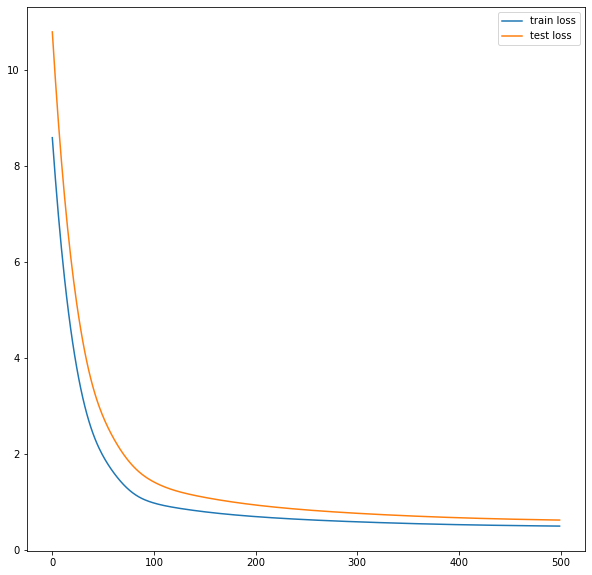

In [17]:
plt.figure(figsize=(10,10))
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [18]:
predictions_train = []
predictions_test =  []
with torch.no_grad():
    predictions_train = model(X_train)
    predictions_test = model(X_test)

In [19]:
def get_accuracy_multiclass(pred_arr,original_arr):
    if len(pred_arr)!=len(original_arr):
        return False
    pred_arr = pred_arr.numpy()
    original_arr = original_arr.numpy()
    final_pred= []
    # we will get something like this in the pred_arr [32.1680,12.9350,-58.4877]
    # so will be taking the index of that argument which has the highest value here 32.1680 which corresponds to 0th index
    for i in range(len(pred_arr)):
        final_pred.append(np.argmax(pred_arr[i]))
    final_pred = np.array(final_pred)
    count = 0
    #here we are doing a simple comparison between the predicted_arr and the original_arr to get the final accuracy
    for i in range(len(original_arr)):
        if final_pred[i] == original_arr[i]:
            count+=1
    return count/len(final_pred)

In [20]:
train_acc = get_accuracy_multiclass(predictions_train,y_train)
test_acc  = get_accuracy_multiclass(predictions_test,y_test)

In [21]:
print(f"Training Accuracy: {round(train_acc*100,3)}")
print(f"Test Accuracy: {round(test_acc*100,3)}")

Training Accuracy: 78.5
Test Accuracy: 72.093


In [22]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.1453, -0.2651, -0.1322,  0.0675,  0.2068,  0.0456, -0.1995,  0.1744,
          -0.0168],
         [ 0.2204,  0.2051,  0.1083,  0.0387, -0.1114, -0.0321, -0.1659,  0.1782,
           0.2884],
         [-0.2084,  0.2100, -0.1812,  0.0518,  0.1803,  0.2344,  0.1293,  0.1205,
           0.0330],
         [-0.2027,  0.1213,  0.1705, -0.0651, -0.1082,  0.0544, -0.3352,  0.1453,
           0.2212]], requires_grad=True),
 Parameter containing:
 tensor([-0.1787,  0.2217, -0.3642,  0.3396], requires_grad=True),
 Parameter containing:
 tensor([[ 0.2323,  0.2043,  0.0477,  0.4769],
         [ 0.0903, -0.4699,  0.3218,  0.2739]], requires_grad=True),
 Parameter containing:
 tensor([0.3281, 0.1415], requires_grad=True)]

In [23]:
# Get the model parameters
params = model.state_dict()

# Convert the parameter tensors into numpy arrays
param_arrays = []

# Save each parameter tensor to a separate CSV file
for key in params:
    param_array = params[key].cpu().numpy()
    np.savetxt(key+'.csv', param_array, delimiter=',', fmt="%.5f")

In [24]:
df = pd.DataFrame(X_test.numpy())

# Save DataFrame to CSV
df.to_csv('X_test.csv', index=False, header=False)

In [42]:
import pandas as pd
import numpy as np

folder = "/gpfs/commons/groups/gursoy_lab/shong/Github/composable-fe-rs/plain_model/breast/"
x_test = pd.read_csv(folder + 'X_test.csv', header=None).values
weight1 = pd.read_csv(folder + 'input_layer.weight.csv', header=None).values
weight2 = pd.read_csv(folder + 'output_layer.weight.csv', header=None).values
bias1 = pd.read_csv(folder + 'input_layer.bias.csv', header=None).values
bias2 = pd.read_csv(folder + 'output_layer.bias.csv', header=None).values
x = x_test[0]
x, weight1, weight2, bias1, bias2

(array([0., 4., 0., 3., 0., 1., 1., 0., 2.]),
 array([[-0.11848,  0.39345,  0.24968, -0.16174, -0.20913,  0.20888,
         -0.14336,  0.17586,  0.23776],
        [ 0.22259, -0.20141,  0.06514, -0.0543 ,  0.14522, -0.05184,
         -0.16943,  0.32842,  0.30742],
        [-0.22358,  0.11684, -0.07109,  0.08267, -0.38832,  0.00212,
          0.14676, -0.03576, -0.08708],
        [-0.26795,  0.34129,  0.17229,  0.13811,  0.05611,  0.02225,
          0.13578,  0.00991, -0.18448]]),
 array([[ 0.35377,  0.23751, -0.16502,  0.08274],
        [-0.30748,  0.20542,  0.35819, -0.11144]]),
 array([[ 0.0931 ],
        [-0.32901],
        [-0.24906],
        [ 0.38493]]),
 array([[0.29904],
        [0.28095]]))

In [107]:
scale = 2**30
x = x_test[0]
x_scale = np.round(x * scale)
weight1_scale = np.trunc(weight1 * scale)
weight2_scale = np.trunc(weight2 * scale)
bias1_scale = np.trunc(bias1 * scale) * scale # scale^2
bias2_scale = np.trunc(bias2 * scale) * (scale**4) # scale^5

layer1 = (np.matmul(weight1, x) + bias1.T) ** 2
# x_scale, weight1_scale, weight2_scale, bias1_scale, bias2_scale
layer2 = (np.matmul(weight2, layer1.T) + bias2).T ** 2

print(layer1, layer2)
print(x_scale, weight1_scale, weight2_scale, bias1_scale, bias2_scale)

[[2.9677642  0.81717984 0.19450746 3.81612318]] [[3.33676981 0.67127083]]
[0.00000000e+00 4.29496730e+09 0.00000000e+00 3.22122547e+09
 0.00000000e+00 1.07374182e+09 1.07374182e+09 0.00000000e+00
 2.14748365e+09] [[-1.27216931e+08  4.22463720e+08  2.68091858e+08 -1.73667002e+08
  -2.24551627e+08  2.24283192e+08 -1.53931627e+08  1.88828237e+08
   2.55292856e+08]
 [ 2.39004192e+08 -2.16262340e+08  6.99435420e+07 -5.83041810e+07
   1.55928787e+08 -5.56627760e+07 -1.81924077e+08  3.52638289e+08
   3.30089711e+08]
 [-2.40067197e+08  1.25455994e+08 -7.63323060e+07  8.87662360e+07
  -4.16955425e+08  2.27633200e+06  1.57582350e+08 -3.83970070e+07
  -9.35014380e+07]
 [-2.87709121e+08  3.66457347e+08  1.84994978e+08  1.48294483e+08
   6.02476530e+07  2.38907550e+07  1.45792664e+08  1.06407810e+07
  -1.98083891e+08]] [[ 3.79857645e+08  2.55024420e+08 -1.77188875e+08  8.88413980e+07]
 [-3.30154136e+08  2.20568045e+08  3.84603583e+08 -1.19657788e+08]] [[ 1.07336991e+17]
 [-3.79322704e+17]
 [-2.8714

In [113]:
v1 = np.matmul(weight1_scale, x_scale.T) + bias1_scale.T # scale^2
v1 = np.square(v1) # scale^4
print("v1 = ", v1)
scale = np.array(scale, dtype=float)
v1_scale = np.array(v1, dtype=float)

# v1_rescale = v1_scale / scale**4
# print("v1_rescale = ", v1_rescale)
# print("v1 true = ", layer1)
# print("error : ", v1_rescale - layer1)
print(weight2_scale.shape, v1.shape, bias2_scale.shape)
v2 = np.matmul(weight2_scale, v1.T) + bias2_scale
v2 = np.square(v2)
print("v2 = ", v2)
# Ensure v2_scale and scale are numpy arrays
v2_scale = np.array(v2, dtype=float)

# Perform the division and rounding
v2_rescale = v2_scale / scale**10
print("result, rescale : ", v2_rescale.T)
print("true            : ", layer2)
print("error :           ", v2_rescale.T - layer2)

v1 =  [[3.94483525e+36 1.08621831e+36 2.58544757e+35 5.07249776e+36]]
(2, 4) (1, 4) (2, 1)
v2 =  [[6.797120121991731e+90]
 [1.3674028262882484e+90]]
result, rescale :  [[3.3367698  0.67127083]]
true            :  [[3.33676981 0.67127083]]
error :            [[-1.72867547e-08 -2.55400112e-09]]


In [109]:
print(v1)
print(v2)

[[3.94483525e+36 1.08621831e+36 2.58544757e+35 5.07249776e+36]]
[[4.12327742e+72]
 [2.13890034e+72]]
